In [2]:
### Library
import numpy as np  
import pandas as pd

import timeit
import time
import os
from datetime import datetime
from pathlib import Path
import ipynbname

import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Make result directory
script_dir = os.path.abspath('')
current_file = ipynbname.name()
dt_string = datetime.now().strftime("%y%m%d_%H%M%S")
result_dir = os.path.join(script_dir, 'Results', current_file, dt_string)
Path(result_dir).mkdir(parents=True, exist_ok=True)

In [87]:
# Sampling data
num_sample = 1000
val_range = np.array([[200, 100, 0.2, 300, 0.2,   1,   1,  22,  -1],  ## Min value 
                      [ 20,  20, 0.1,  20, 0.2, 0.2, 0.2, 0.5, 0.5],  ## Step value 
                      [ 11,  11,  11,  11,  11,  11,  11,  11,  15]]  ## Number of step
                      )
sampled_data = np.array([val_range[0, i] + np.random.randint(0, val_range[2, i], num_sample)*val_range[1, i] for i in range(val_range.shape[1])]).transpose()

sampled_data_df = pd.DataFrame(np.hstack((np.linspace(0, num_sample-1, num_sample).reshape(-1,1), sampled_data)), columns=['ID', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9'])
sampled_data_df.to_csv(os.path.join(result_dir, 'Sampled_data.csv'), index=False)
sampled_data_df = pd.DataFrame(sampled_data, columns=['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9'])


In [88]:
# Statistical features
print('----- Data summary -----')
sampled_data_df.head()
print(sampled_data_df.describe())
new_df = pd.DataFrame(round(sampled_data_df.describe(), 2))
# new_df.to_csv(os.path.join(result_dir, 'Statistical_Features.csv'), index=True)

----- Data summary -----
               x_1          x_2          x_3          x_4          x_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    299.780000   199.280000     0.690600   400.900000     1.212600   
std      62.432759    62.745666     0.320147    63.866023     0.640603   
min     200.000000   100.000000     0.200000   300.000000     0.200000   
25%     240.000000   140.000000     0.400000   340.000000     0.600000   
50%     300.000000   200.000000     0.700000   400.000000     1.200000   
75%     360.000000   260.000000     1.000000   460.000000     1.800000   
max     400.000000   300.000000     1.200000   500.000000     2.200000   

              x_6          x_7          x_8          x_9  
count  1000.00000  1000.000000  1000.000000  1000.000000  
mean      2.01640     2.018800    24.536000     2.538500  
std       0.62177     0.642977     1.563377     2.111096  
min       1.00000     1.000000    22.000000    -1.000000  
25%       1.5

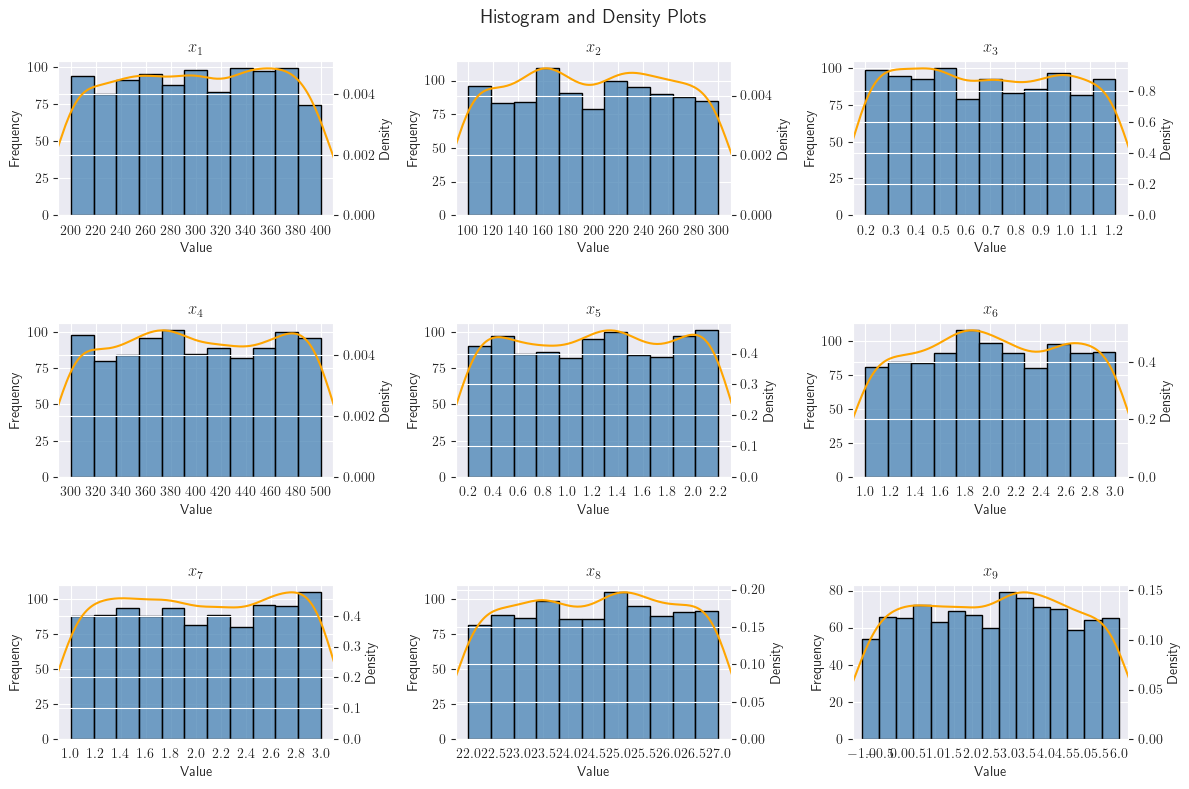

In [89]:
# Histogram and Density plots
plt.rcParams['text.usetex'] = True
[nrows, ncols] = [3, 3]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
fig.suptitle(r'Histogram and Density Plots', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
for i, col in enumerate(sampled_data_df.columns):
    # ax1 = axes[i % nrows, (i//nrows) % ncols]
    ax1 = axes[(i//ncols) % nrows, i % ncols]
    ax1.set_title(rf'${{{col}}}$')
    ax1.set_xlabel(r'Value', fontsize=10)
    ax1.set_ylabel(r'Frequency', fontsize=10)
    ax1.set_xlim(min(sampled_data_df[col])-0.5*val_range[1, i], max(sampled_data_df[col])+0.5*val_range[1, i])
    ax1.set_xticks(np.arange(min(sampled_data_df[col]), max(sampled_data_df[col])+val_range[1, i], val_range[1, i]))
    sns.histplot(sampled_data_df[col], kde=False, ax=ax1, bins=int(val_range[2, i]), color='steelblue', edgecolor='black', linewidth=1.0)
    ax2 = ax1.twinx()
    sns.kdeplot(sampled_data_df[col], ax=ax2, fill=False, color='orange', linewidth=1.5)
    ax2.set_ylabel(r'Density', fontsize=10)
plt.grid(False)
plt.tight_layout(rect=(0, 0, 1, 1))
plt.subplots_adjust(hspace=0.7)
plt.savefig(os.path.join(result_dir, 'Histogram_and_Density.png'), dpi=400)
plt.show()

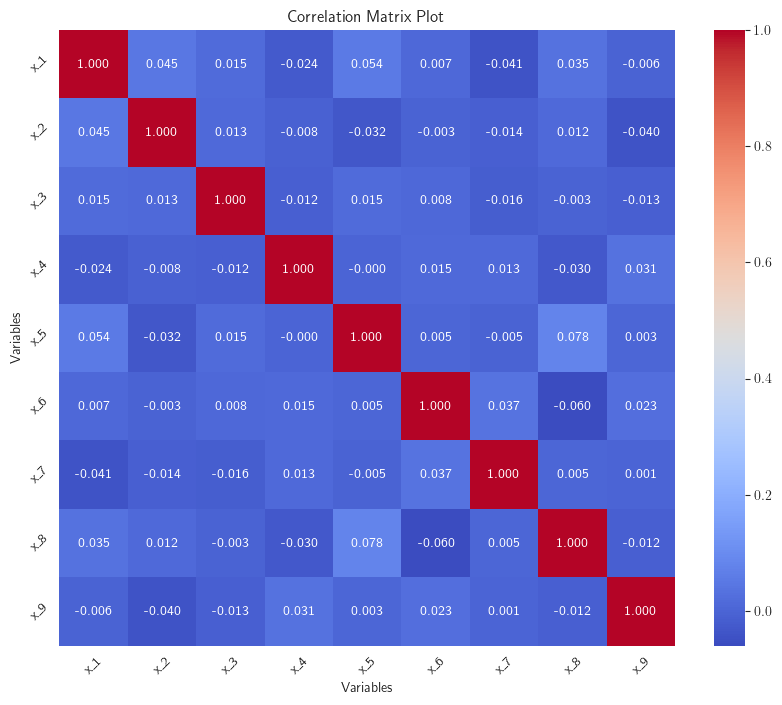

In [90]:
# Full variables correlation
plt.rcParams['text.usetex'] = True
corr_matrix_full = sampled_data_df.corr()
num_var = corr_matrix_full.shape[0]
new_df = pd.DataFrame(corr_matrix_full)
# new_df.to_csv(os.path.join(result_dir, 'Correlation_Matrix.csv'), header=None, index=False)
plt.figure(r'Correlation Matrix', figsize=(10, 8))
sns.heatmap(corr_matrix_full, annot=True, fmt=".3f", cmap="coolwarm", square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title(r'Correlation Matrix Plot')
plt.xlabel(r'Variables')
plt.ylabel(r'Variables')
plt.savefig(os.path.join(result_dir, 'Correlation_Matrix.png'), dpi=400)
plt.show()

In [91]:
# # Visualize data with parallel coordinates plot
# color_var='x_1'
# fig = px.parallel_coordinates(sampled_data_df, color=color_var,
#                               color_continuous_scale=[[0, 'blue'], [1, 'red']], range_color=[min(sampled_data_df[color_var]), max(sampled_data_df[color_var])], color_continuous_midpoint=2)
# fig.update_layout(title={'text': 'Parallel Coordinate Plot', 'x': 0.5, 'y': 1.0})
# fig.update_layout(font=dict(size=16))
# # fig.write_image(os.path.join(result_dir, 'Parallel_Coordinates.png'), format="png", width=1200, height=800, scale=2)
# fig.show()